# Del 5: Strojno učenje: Linearna regresija

## The Linear Regression Model

### Instance Based Learning Vs. Model Based Learning

###  Introduction To The Data

In [1]:
import pandas as pd
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")

In [2]:
train = data[0:1460]
test = data[1460:]

In [3]:
#train.info()
target = 'SalePrice'

### Simple Linear Regression

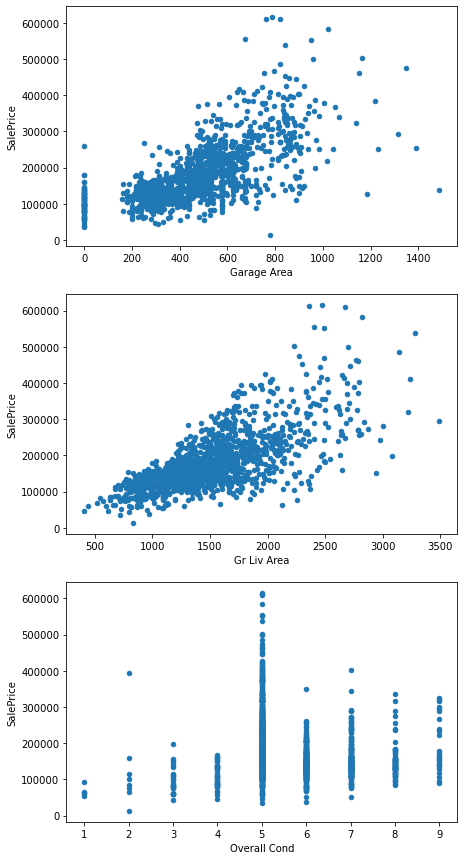

In [4]:
import matplotlib.pyplot as plt
import seaborn

fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

In [5]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


### Least Squares

**Residual Sum Of Squares**

<p><img src="https://s3.amazonaws.com/dq-content/235/rss.gif"></p>

### Using Scikit-Learn To Train And Predict

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train[['Gr Liv Area']], train['SalePrice'])

LinearRegression()

In [7]:
lr.coef_

array([116.86624683])

In [8]:
lr.intercept_

5366.821710056043

### Making Predictions

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [10]:
test_predictions = lr.predict(test[['Gr Liv Area']])

In [11]:
test_mse = mean_squared_error(test_predictions, test['SalePrice'])
test_rmse = np.sqrt(test_mse)
print(test_rmse)

57088.25161263909


### Multiple Linear Regression

In [12]:
lr = LinearRegression()
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
test_predictions = lr.predict(test[cols])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])
test_rmse = np.sqrt(test_mse)
print(test_rmse)

57066.90779448559


## Feature Selection

### Missing Values

In [13]:
import pandas as pd

data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [14]:
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [15]:
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)

In [16]:
null_series = numerical_train.isnull().sum()

In [17]:
full_cols_series = null_series[null_series == 0]

In [18]:
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

### Correlating Feature Columns With Target Column

In [19]:
len(full_cols_series)

25

In [20]:
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()

In [21]:
#corrmat

In [22]:
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

### Correlation Matrix Heatmap

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]

In [25]:
corrmat = train_subset[strong_corrs.index].corr()

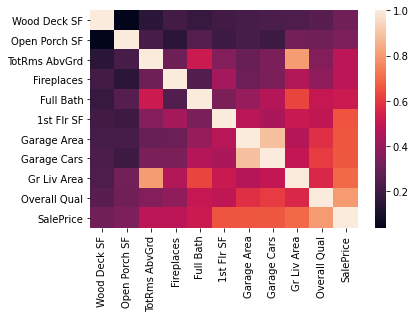

In [26]:
sns.heatmap(corrmat)
plt.show()

In [27]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

In [28]:
features = final_corr_cols.drop(['SalePrice']).index
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [29]:
target = 'SalePrice'

In [30]:
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB


In [31]:
clean_test = test[final_corr_cols.index].dropna()

### Train And Test Model

In [32]:
lr = LinearRegression()
lr.fit(train[features], train[target])

test_predictions = lr.predict(clean_test[features])

test_mse = mean_squared_error(test_predictions, clean_test[target])

test_rmse = np.sqrt(test_mse)

print(test_rmse)

41032.026120197705


### Removing Low Variance Features

In [33]:
unit_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())

In [34]:
unit_train.describe()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.138207,0.084983,0.198402,0.391438,0.335449,0.318119,0.351245,0.567580
std,0.181836,0.118058,0.215846,0.136459,0.160668,0.142642,0.151916,0.156512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250000,0.211704,0.224798,0.238091,0.444444
50%,0.000000,0.047532,0.333333,0.500000,0.307229,0.322581,0.339274,0.555556
75%,0.251497,0.127971,0.333333,0.500000,0.434703,0.387097,0.429439,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
sorted_vars = unit_train.var().sort_values()
sorted_vars

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [36]:
features = features.drop('Open Porch SF')

In [37]:
features

Index(['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual'],
      dtype='object')

### Final Model

In [38]:
lr = LinearRegression()
lr.fit(train[features], train[target])

LinearRegression()

In [39]:
test_predictions = lr.predict(clean_test[features])

test_mse = mean_squared_error(test_predictions, clean_test[target])

test_rmse_2 = np.sqrt(test_mse)

print(test_rmse_2)

40591.42702437715


## Overfitting

### Introduction

In [40]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("data/auto-mpg.data", delim_whitespace=True, names=columns)

In [58]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [59]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [60]:
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [61]:
filtered_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


### Bias and Variance

### Bias-variance tradeoff

<p><img alt="Imgur" src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png"></p>


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def train_and_test(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    lr = LinearRegression()
    lr.fit(features, target)
    predictions = lr.predict(features)
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

In [64]:
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

In [65]:
cyl_mse, cyl_var

(24.020179568155537, 36.74255887416014)

In [66]:
weight_mse, weight_var

(18.6766165974193, 42.08612184489639)

### Multivariate models

In [67]:
one_mse, one_var = train_and_test(["cylinders"])
one_mse, one_var

(24.020179568155537, 36.74255887416014)

In [68]:
two_mse, two_var = train_and_test(["cylinders", "displacement"])
two_mse, two_var

(21.282057055586364, 39.48068138672938)

In [69]:
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
three_mse, three_var

(20.25295483971423, 40.509783602601395)

In [70]:
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
four_mse, four_var

(17.763860571843846, 42.998877870471794)

In [71]:
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
five_mse, five_var

(17.761396105406217, 43.00134233690936)

In [72]:
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
six_mse, six_var

(11.590170981415227, 49.172567460900346)

In [73]:
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
seven_mse, seven_var

(10.847480945000449, 49.91525749731511)

### Cross validation

In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [76]:
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        variance_values.append(var)
        mse_values.append(mse)
   
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)

In [77]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
two_mse, two_var

(21.584370274954374, 38.90252531375602)

In [78]:
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
three_mse, three_var

(20.655622193882955, 40.091287956606955)

In [79]:
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
four_mse, four_var

(18.169683239081888, 42.507643643644386)

In [80]:
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
five_mse, five_var

(18.283038517172056, 42.5987363001468)

In [81]:
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
six_mse, six_var

(12.099685425467118, 48.92824696771799)

In [82]:
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
seven_mse, seven_var

(11.41813197181206, 49.90431373098732)

### Plotting cross-validation error vs. cross-validation variance

In [83]:
import matplotlib.pyplot as plt

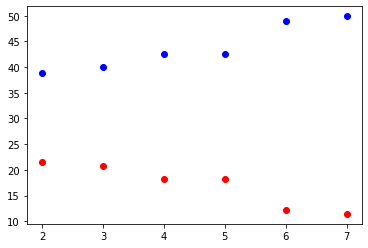

In [84]:
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()

## Processing And Transforming Features


In [41]:
import pandas as pd

data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")

In [42]:
data.headad()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [43]:
train = data[0:1460]
test = data[1460:]

In [48]:
#train.info()

In [46]:
train_null_counts = train.isnull().sum()

In [54]:
#train_null_counts[train_null_counts==0].index

In [55]:
df_no_mv = train[train_null_counts[train_null_counts==0].index]

In [56]:
df_no_mv.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


### Categorical Features

In [57]:
print(train['Utilities'].value_counts())

AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


In [58]:
print(train['Street'].value_counts())

Pave    1455
Grvl       5
Name: Street, dtype: int64


In [59]:
print(train['House Style'].value_counts())

1Story    743
2Story    440
1.5Fin    160
SLvl       60
SFoyer     35
2.5Unf     11
1.5Unf      8
2.5Fin      3
Name: House Style, dtype: int64


In [60]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns
print(text_cols)

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       'Kitchen Qual', 'Functional', 'Paved Drive', 'Sale Type',
       'Sale Condition'],
      dtype='object')


In [61]:
for col in text_cols:
    print(col+":", len(train[col].unique()))
    train.loc[:, col] = train.loc[:, col].astype('category')

MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### Dummy Coding

In [64]:
#pd.get_dummies(train['Lot Shape'])

In [65]:
dummy_cols = pd.DataFrame()


for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]

In [66]:
train.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,ConLI,ConLw,New,Oth,WD,Abnorml,Alloca,Family,Normal,Partial
0,1,526301100,20,141.0,31770,NaN,6,5,1960,1960,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,80.0,11622,NaN,5,6,1961,1961,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,81.0,14267,NaN,6,6,1958,1958,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,93.0,11160,NaN,7,5,1968,1968,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,74.0,13830,NaN,5,5,1997,1998,...,0,0,0,0,1,0,0,0,1,0


### Transforming Improper Numerical Features

In [67]:
train[['Year Remod/Add', 'Year Built']].head()

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


In [68]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

### Missing Values

In [69]:
import pandas as pd

data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()
df_missing_values = train[train_null_counts[(train_null_counts>0) & (train_null_counts<584)].index]

print(df_missing_values.isnull().sum())
print(df_missing_values.dtypes)

Lot Frontage      249
Mas Vnr Type       11
Mas Vnr Area       11
Bsmt Qual          40
Bsmt Cond          40
Bsmt Exposure      41
BsmtFin Type 1     40
BsmtFin SF 1        1
BsmtFin Type 2     41
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Qual        75
Garage Cond        75
dtype: int64
Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
dtype: object


### Imputing Missing Values

In [70]:
float_cols = df_missing_values.select_dtypes(include=['float'])

float_cols = float_cols.fillna(float_cols.mean())
float_cols.isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64

## Vaja: Predicting House Sale Prices

###  Introduction

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [72]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")

In [73]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
#df.info(memory_usage='deep')

In [74]:
def transform_features(df):
    return df

In [75]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [80]:
def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    

    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [81]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.25161263909

### Feature Engineering

In [109]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")

In [110]:
# odstranimo vse stolpce ki imajo 5%+ procentov mankajočih vrednosti 
num_missing = df.isnull().sum()
drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values().index
df = df.drop(drop_missing_cols, axis=1)

In [111]:
# odstrnimo vse text stolpce, ki vsebujejo manjkajoče vrednosti
text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0].index
df = df.drop(drop_missing_cols_2, axis=1)

In [112]:
# za vse numerične stolpce nadomestimo, manjkajoče vrednosti z najpogostejšo vrednostjo
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing>0)].sort_values()
replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
df = df.fillna(replacement_values_dict)

In [113]:
df.isnull().sum().sum()

0

In [120]:
# preuredimo nakatere stolpce, da dobimo bolj uporabne informacije
years_sold = df['Yr Sold'] - df['Year Built']
#years_sold[years_sold < 0]

years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
#years_since_remod[years_since_remod < 0]

df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

df = df.drop([1702,2180,2181], axis=0)



2180   -1
dtype: int64

In [124]:
def transform_features(df):
    # skopiramo podatke v nov dataframe
    df_transformed = df.copy()
    
    # odstranimo vse stolpce ki imajo 5%+ procentov mankajočih vrednosti
    columns_before = df_transformed.shape[1]
    num_missing = df_transformed.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df_transformed)/20)].sort_values().index
    df_transformed = df_transformed.drop(drop_missing_cols, axis=1)
    print(f'Dropping {columns_before - df_transformed.shape[1]} columns with 5%+ missing values.')

    
    # odstrnimo vse text stolpce, ki vsebujejo manjkajoče vrednosti
    columns_before = df_transformed.shape[1]
    text_mv_counts = df_transformed.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0].index
    df_transformed = df_transformed.drop(drop_missing_cols_2, axis=1)
    print(f'Dropping {columns_before - df_transformed.shape[1]} object columns with any missing values.')
    

    # za vse numerične stolpce nadomestimo, manjkajoče vrednosti z najpogostejšo vrednostjo
    num_missing = df_transformed.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df_transformed)/20) & (num_missing>0)].sort_values()
    replacement_values_dict = df_transformed[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df_transformed = df_transformed.fillna(replacement_values_dict)
    print(f'Filling {len(replacement_values_dict)} columns missing vlues with mode value. ')

    
    # preverimo da ni več manjkajočih vrednosti
    if df_transformed.isnull().sum().sum() == 0:
        print('All missing values removed.')
    else:
        raise ValueError('Dataframe is containing missing values.')
    
    # preuredimo nakatere stolpce, da dobimo bolj uporabne informacije
    years_sold = df_transformed['Yr Sold'] - df_transformed['Year Built']
    years_since_remod = df_transformed['Yr Sold'] - df_transformed['Year Remod/Add']
    df_transformed['Years Before Sale'] = years_sold
    df_transformed['Years Since Remod'] = years_since_remod
    df_transformed = df_transformed.drop([1702,2180,2181], axis=0)
    
    # odstranimo še ostale stolpe, ki jih ne potrebujemo
    df_transformed = df_transformed.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Yr Sold", "Year Built", "Year Remod/Add"], axis=1)
    
    print(f'After transform_features ---> {df_transformed.shape[1]} columns in DF.')
    return df_transformed

In [125]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

Dropping 11 columns with 5%+ missing values.
Dropping 7 object columns with any missing values.
Filling 9 columns missing vlues with mode value. 
All missing values removed.
After transform_features ---> 58 columns in DF.


55275.36731241307

### Feature Selection

In [129]:
# odstranimo tiste vrednsoti, ki imajo korelacijo manjšo od 0.4
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs[abs_corr_coeffs > 0.4]


BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [133]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [135]:
transform_cat_cols = []
for col in nominal_features:
    if col in df.columns:
        transform_cat_cols.append(col)

In [136]:
uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

In [137]:
uniqueness_counts

Street               2
Alley                2
Central Air          2
Land Contour         4
Misc Feature         5
Lot Config           5
Bldg Type            5
Mas Vnr Type         5
Sale Condition       6
Garage Type          6
Heating              6
Foundation           6
Roof Style           6
MS Zoning            7
House Style          8
Roof Matl            8
Condition 2          8
Condition 1          9
Sale Type           10
MS SubClass         16
Exterior 1st        16
Exterior 2nd        17
Neighborhood        28
PID               2930
dtype: int64

In [140]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    # odstranimo tiste vrednsoti, ki imajo korelacijo manjšo od 0.4
    columns_before = df.shape[1]
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    print(f'Dropping {columns_before - df.shape[1]} numeric columns with correlation less then {coeff_threshold}. Current: {df.shape[1]}')
        
    # stolpci ki so primerni za pretvorbo v kategorije
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    # izberemo stolpce, ki so še v df da jaih lahko pretvorimo v category 
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    # za vsak stolpec izračunamo število edinstvenih vrednosti
    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_noonuniq_cols = uniqueness_counts[uniqueness_counts > uniq_threshold].index
    columns_before = df.shape[1]
    df = df.drop(drop_noonuniq_cols, axis=1)
    print(f'Dropping {columns_before - df.shape[1]} object columns with more then {uniq_threshold} unique values. Current: {df.shape[1]}')
    
    # pretvorimo v category in nato izračunamo dummie vrednosti za te stolpce
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols, axis=1)
    print(f'After select_features ---> {df.shape[1]} columns with types: {df.dtypes.value_counts().to_dict()}')
    return df


In [141]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10)
rmse = train_and_test(filtered_df)

rmse

Dropping 11 columns with 5%+ missing values.
Dropping 7 object columns with any missing values.
Filling 9 columns missing vlues with mode value. 
All missing values removed.
After transform_features ---> 58 columns in DF.
Dropping 19 numeric columns with correlation less then 0.4. Current: 39
Dropping 3 object columns with more then 10 unique values. Current: 36
After select_features ---> 130 columns with types: {dtype('uint8'): 116, dtype('int64'): 9, dtype('float64'): 5}


33367.28718340284

### Train And Test

In [146]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)

        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [149]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10)
rmse = train_and_test(filtered_df, k=4)

rmse

Dropping 11 columns with 5%+ missing values.
Dropping 7 object columns with any missing values.
Filling 9 columns missing vlues with mode value. 
All missing values removed.
After transform_features ---> 58 columns in DF.
Dropping 19 numeric columns with correlation less then 0.4. Current: 39
Dropping 3 object columns with more then 10 unique values. Current: 36
After select_features ---> 130 columns with types: {dtype('uint8'): 116, dtype('int64'): 9, dtype('float64'): 5}


29267.06129853638

### Finding best result

In [152]:
result_dict = {}
#0.3 -> 0.7 -> 0.05

df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)

for coeff_threshold in np.arange(0.3, 0.8, 0.05):
    coeff_threshold = round(coeff_threshold, 2)
    # unique vrednosti 7 -13
    for uniq_threshold in range(7,14,1):
        filtered_df = select_features(transform_df, coeff_threshold=coeff_threshold, uniq_threshold=uniq_threshold)
        rmse = train_and_test(filtered_df, k=5)
        result_dict[(coeff_threshold, uniq_threshold)] = rmse


Dropping 11 columns with 5%+ missing values.
Dropping 7 object columns with any missing values.
Filling 9 columns missing vlues with mode value. 
All missing values removed.
After transform_features ---> 58 columns in DF.
Dropping 17 numeric columns with correlation less then 0.3. Current: 41
Dropping 7 object columns with more then 7 unique values. Current: 34
After select_features ---> 99 columns with types: {dtype('uint8'): 83, dtype('int64'): 11, dtype('float64'): 5}
Dropping 17 numeric columns with correlation less then 0.3. Current: 41
Dropping 4 object columns with more then 8 unique values. Current: 37
After select_features ---> 123 columns with types: {dtype('uint8'): 107, dtype('int64'): 11, dtype('float64'): 5}
Dropping 17 numeric columns with correlation less then 0.3. Current: 41
Dropping 3 object columns with more then 9 unique values. Current: 38
After select_features ---> 132 columns with types: {dtype('uint8'): 116, dtype('int64'): 11, dtype('float64'): 5}
Dropping 17 

Dropping 22 numeric columns with correlation less then 0.49999999999999994. Current: 36
Dropping 3 object columns with more then 10 unique values. Current: 33
After select_features ---> 127 columns with types: {dtype('uint8'): 116, dtype('int64'): 7, dtype('float64'): 4}
Dropping 22 numeric columns with correlation less then 0.49999999999999994. Current: 36
Dropping 3 object columns with more then 11 unique values. Current: 33
After select_features ---> 127 columns with types: {dtype('uint8'): 116, dtype('int64'): 7, dtype('float64'): 4}
Dropping 22 numeric columns with correlation less then 0.49999999999999994. Current: 36
Dropping 3 object columns with more then 12 unique values. Current: 33
After select_features ---> 127 columns with types: {dtype('uint8'): 116, dtype('int64'): 7, dtype('float64'): 4}
Dropping 22 numeric columns with correlation less then 0.49999999999999994. Current: 36
Dropping 3 object columns with more then 13 unique values. Current: 33
After select_features ---

Dropping 31 numeric columns with correlation less then 0.7499999999999999. Current: 27
Dropping 7 object columns with more then 7 unique values. Current: 20
After select_features ---> 85 columns with types: {dtype('uint8'): 83, dtype('int64'): 2}
Dropping 31 numeric columns with correlation less then 0.7499999999999999. Current: 27
Dropping 4 object columns with more then 8 unique values. Current: 23
After select_features ---> 109 columns with types: {dtype('uint8'): 107, dtype('int64'): 2}
Dropping 31 numeric columns with correlation less then 0.7499999999999999. Current: 27
Dropping 3 object columns with more then 9 unique values. Current: 24
After select_features ---> 118 columns with types: {dtype('uint8'): 116, dtype('int64'): 2}
Dropping 31 numeric columns with correlation less then 0.7499999999999999. Current: 27
Dropping 3 object columns with more then 10 unique values. Current: 24
After select_features ---> 118 columns with types: {dtype('uint8'): 116, dtype('int64'): 2}
Dropp

In [155]:
min(result_dict, key=result_dict.get)

(0.3, 13)

In [156]:
result_dict[(0.3, 13)]

28616.77171161057

### Alternativa

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    
    X = df[features]
    y = df["SalePrice"]
    
    lr = LinearRegression()

    cv_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=k)
    rmse = np.mean(np.sqrt(np.abs(cv_scores)))
    return rmse

In [159]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.3, uniq_threshold=13)
rmse = train_and_test(filtered_df, k=7)

Dropping 11 columns with 5%+ missing values.
Dropping 7 object columns with any missing values.
Filling 9 columns missing vlues with mode value. 
All missing values removed.
After transform_features ---> 58 columns in DF.
Dropping 17 numeric columns with correlation less then 0.3. Current: 41
Dropping 3 object columns with more then 13 unique values. Current: 38
After select_features ---> 132 columns with types: {dtype('uint8'): 116, dtype('int64'): 11, dtype('float64'): 5}


In [160]:
rmse

29173.07599146904